In [2]:
import tensorflow as tf

x = tf.Variable(3, name="x")
y = tf.Variable(3, name="y")
f = x*x*y + y + 2


sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)

result = sess.run(f)
print(result)

sess.close

32


<bound method BaseSession.close of <tensorflow.python.client.session.Session object at 0x10a303940>>

In [7]:
import tensorflow as tf

init = tf.global_variables_initializer()
sess = tf.InteractiveSession() # init 노드 준비
init.run()
result = f.eval()
print(result)
sess.close()

32


In [10]:
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [11]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)

In [12]:
x2.graph is graph

True

In [13]:
x2.graph is tf.get_default_graph()

False

In [14]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    print(y.eval()) # 10
    print(z.eval()) # 15

10
15


In [15]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    y_val, z_val = sess.run([y,z])
    print(y.eval()) # 10
    print(z.eval()) # 15

10
15


In [17]:
import numpy as np
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype= tf.float32, name='X')
y = tf.constant(housing.target.reshape(-1,1), dtype = tf.float32, name='y')

XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X)), XT), y)

with tf.Session() as sess:
    theta_value = theta.eval()

In [18]:
theta_value

array([[-3.7465141e+01],
       [ 4.3573415e-01],
       [ 9.3382923e-03],
       [-1.0662201e-01],
       [ 6.4410698e-01],
       [-4.2513184e-06],
       [-3.7732250e-03],
       [-4.2664889e-01],
       [-4.4051403e-01]], dtype=float32)

In [20]:
n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n+1,1], -1.0 , 1.0), name= "theta") # 난수를 담은 텐서를 생성하는 노드를 그래프에 생성, 넘파이의 rand()함수처럼 크기와 난수의 범위를 입력 받습니다.
y_pred = tf.matmul(X, theta, name="predictions")

error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name= "mse")
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients) # 변수에 새로운 값을 할당하는 노드를 생성 / 여기서는 배치 경사 하강법의 스템

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    best_theta = theta.eval()

Epoch 0 MSE = 102589.64
Epoch 100 MSE = nan
Epoch 200 MSE = nan
Epoch 300 MSE = nan
Epoch 400 MSE = nan
Epoch 500 MSE = nan
Epoch 600 MSE = nan
Epoch 700 MSE = nan
Epoch 800 MSE = nan
Epoch 900 MSE = nan


In [21]:
A = tf.placeholder(tf.float32, shape=(None,3))
B = A + 5
with tf.Session() as sess:
    B_val_1 = B.eval(feed_dict= {A: [[1,2,3]]})
    B_val_2 = B.eval(feed_dict= {A: [[4,5,6], [7,8,9]]})

In [22]:
print(B_val_1)

[[6. 7. 8.]]


In [23]:
print(B_val_2)

[[ 9. 10. 11.]
 [12. 13. 14.]]


In [24]:
with tf.name_scope("loss") as scope:
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name="mse")

In [25]:
print(error.op.name)

loss/sub


In [26]:
print(mse.op.name)

loss/mse


In [27]:
n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")

w1 = tf.Variable(tf.random_normal((n_features, 1)), name="weights1")
w2 = tf.Variable(tf.random_normal((n_features, 1)), name="weights2")
b1 = tf.Variable(0.0, name="bias1")
b2 = tf.Variable(0.0, name="bias2")

z1 = tf.add(tf.matmul(X, w1), b1, name="z1")
z2 = tf.add(tf.matmul(X, w1), b1, name="z2")

relu1 = tf.maximum(z1, 0., name='relu1')
relu2 = tf.maximum(z2, 0., name='relu2')

ouput = tf.add(relu1, relu2, name="output")

In [28]:
def relu(X):
    w_shape = (int(X.get_shape()[1]),1)
    w = tf.Variable(tf.random_normal(w_shape), name="weights")
    b = tf.Variable(0.0, name="bias")
    z = tf.add(tf.matmul(X,w), b, name="z")
    return tf.maximum(z, 0., name='relu')

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

# 연습문제 12

In [31]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
m = 1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

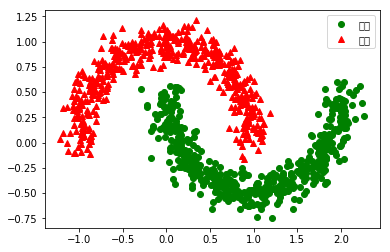

In [32]:
plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'go', label="양성")
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'r^', label="음성")
plt.legend()
plt.show()

모든 샘플에 추가적인 편향 특성($x_0 = 1$)을 추가해야 합니다. 이렇게 하려면 입력 행렬 $\mathbf{X}$의 왼쪽에 1로 채워진 열을 추가해야 합니다:

In [33]:
X_moons_with_bias = np.c_[np.ones((m, 1)), X_moons]

In [34]:
X_moons_with_bias[:5]

array([[ 1.        , -0.05146968,  0.44419863],
       [ 1.        ,  1.03201691, -0.41974116],
       [ 1.        ,  0.86789186, -0.25482711],
       [ 1.        ,  0.288851  , -0.44866862],
       [ 1.        , -0.83343911,  0.53505665]])

좋네요. 이제 `y_train`의 크기를 바꾸어 열 벡터로 만들겠습니다(즉, 하나의 열이 있는 2D 배열입니다):

In [35]:
y_moons_column_vector = y_moons.reshape(-1, 1)

In [36]:
test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

In [37]:
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

In [38]:
X_batch, y_batch = random_batch(X_train, y_train, 5)
X_batch

array([[ 1.        ,  0.87143617, -0.56605936],
       [ 1.        ,  0.5677336 ,  0.87520013],
       [ 1.        ,  0.28458406, -0.24057598],
       [ 1.        , -0.56899067,  0.8572578 ],
       [ 1.        , -0.19563087,  0.84315423]])

In [39]:
y_batch

array([[1],
       [0],
       [1],
       [0],
       [0]])

In [41]:
# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
reset_graph()

_moons_ 데이터셋은 두 개의 입력 특성을 가지므로 각 샘플은 평면 위의 한 점입니다(즉, 2차원입니다):